# Multiple Linear Regression

### Import the required libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read the data

In [78]:
housing = pd.read_csv(r"C:\Users\Bhupendra\Desktop\DataCenter\Regressions\Housing.csv", delimiter = ',')
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [80]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Visualization

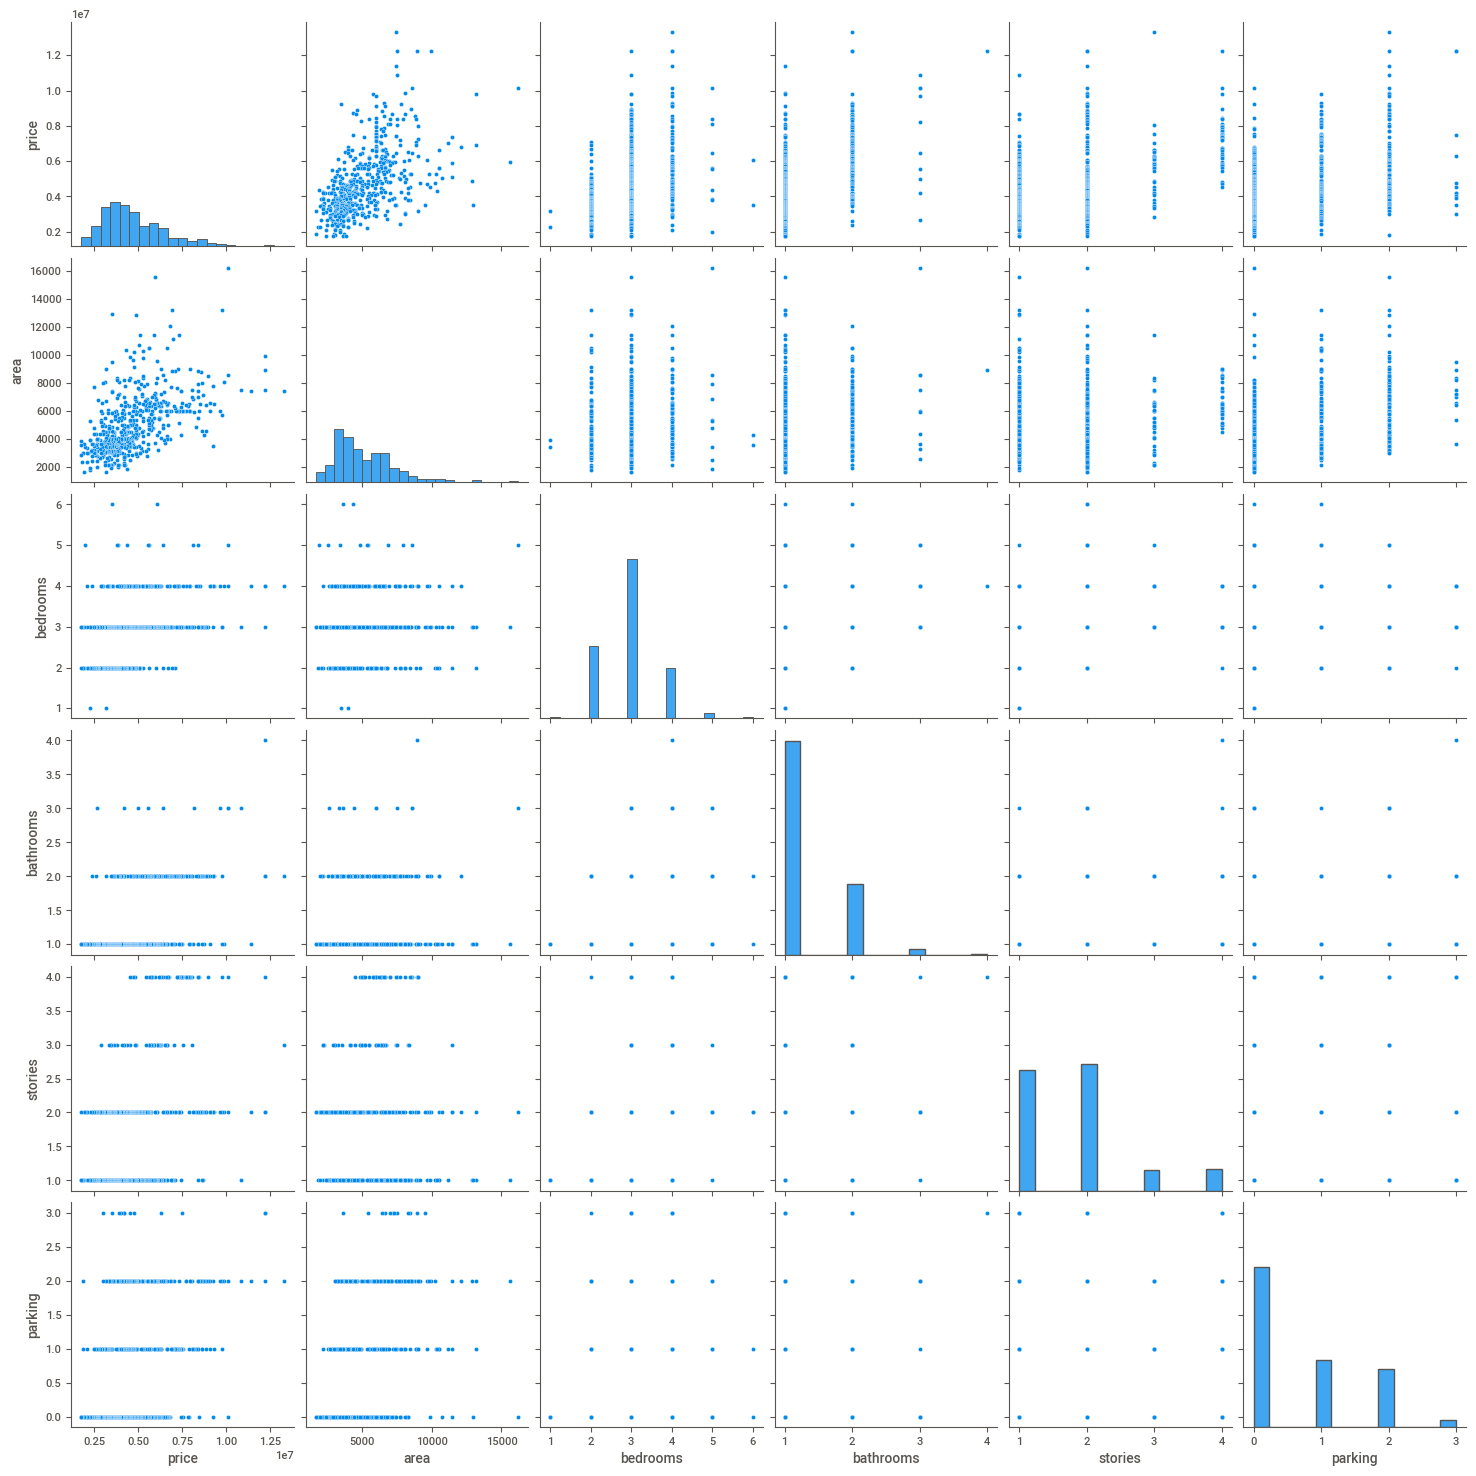

In [81]:
sns.pairplot(housing)
plt.show()

In [82]:
numeric_cols = housing.select_dtypes(['int', 'float']).columns
numeric_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

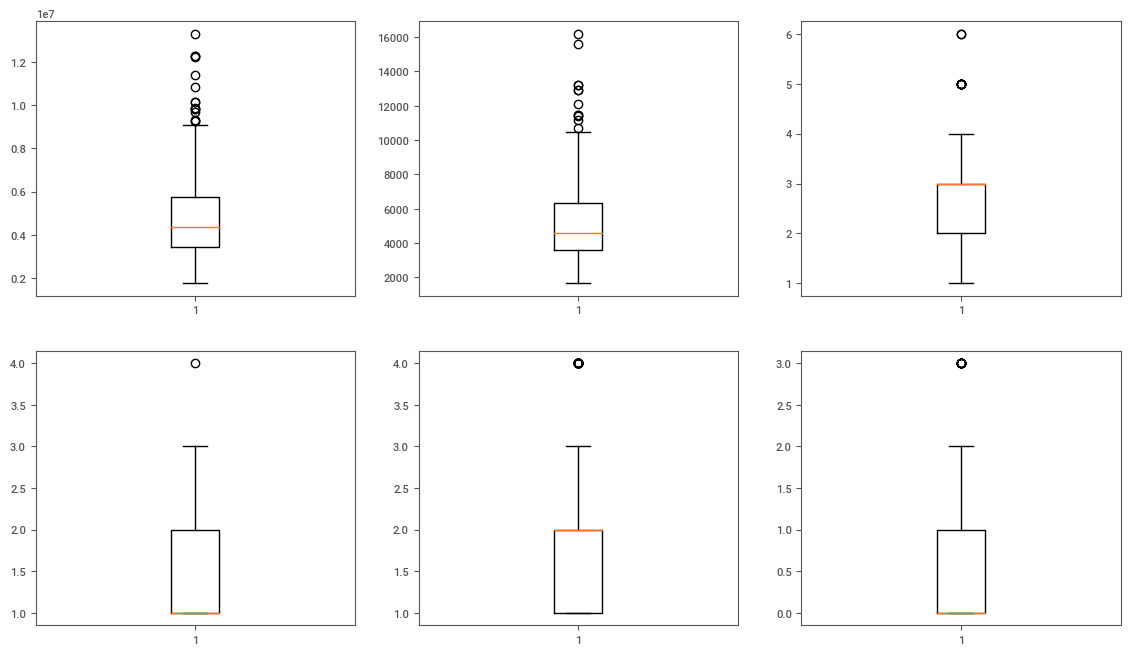

In [83]:
fig,ax = plt.subplots(2,3, figsize = (14,8))

k=0
for i in  range(0,2):
    for j in range(0,3):
        ax[i,j].boxplot(housing[numeric_cols[k]])
        k+=1
        
plt.show()

In [84]:
cat_cols = housing.select_dtypes('object').columns
cat_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

# SweetViz : automating the data analysis part

In [86]:
import sweetviz as sv
sweet_report = sv.analyze(housing)
sweet_report.show_html('housing_analysis.html')

                                             |                                             | [  0%]   00:00 ->…

Report housing_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Label Encoding

In [87]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [88]:
housing.mainroad=housing.mainroad.map({'yes':1,'no':0})
housing.guestroom=housing.guestroom.map({'yes':1,'no':0})
housing.basement=housing.basement.map({'yes':1,'no':0})
housing.hotwaterheating=housing.hotwaterheating.map({'yes':1,'no':0})
housing.airconditioning=housing.airconditioning.map({'yes':1,'no':0})
housing.prefarea=housing.prefarea.map({'yes':1,'no':0})

In [89]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [90]:
housing.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

**Using LabelEncoder class for label encoding**

In [91]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit_transform(housing.furnishingstatus)[:10]

array([0, 0, 1, 0, 0, 1, 1, 2, 0, 2])

In [92]:
encoder.classes_

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [93]:
housing.furnishingstatus = encoder.fit_transform(housing.furnishingstatus)

In [94]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## After converting all categorical columns into numerical ones now our data is ready for modelling

# Model Training

## train_test_split

In [116]:
from sklearn.model_selection import train_test_split

X = housing.drop('price', axis = 1)
y = housing.price

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

## Model 1

In [98]:
from sklearn.linear_model import LinearRegression

# Training
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

### prediction

In [100]:
y_pred = model1.predict(X_test)
y_pred[:5]

array([5407508.87024418, 7097185.46706855, 3055462.44314053,
       4476945.19636315, 3315983.65663579])

In [101]:
y_test[:5]

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
Name: price, dtype: int64

## Model Evaluation

### r2 score

In [102]:
model1.score(X_test,y_test)

0.6435419628959107

Model is able to explain **64.35%** variance in the data which is an average score.

### root mean square error

In [104]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

1238970.4429194627

### distribution of residuals

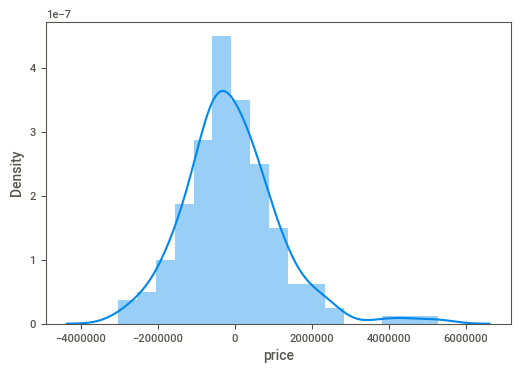

In [105]:
sns.distplot(y_test-y_pred);

**residuals are normally distributed, satisfying one of the assumptions of OLS(Ordinary Least Square) model**

# Improving the model performance

# Model 2

In [107]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## Scaling the predictor variables

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [117]:
X = housing.drop('price', axis = 1)
y = housing.price

In [118]:
X.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0


In [119]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [120]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)
X.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286


## Feature Selection

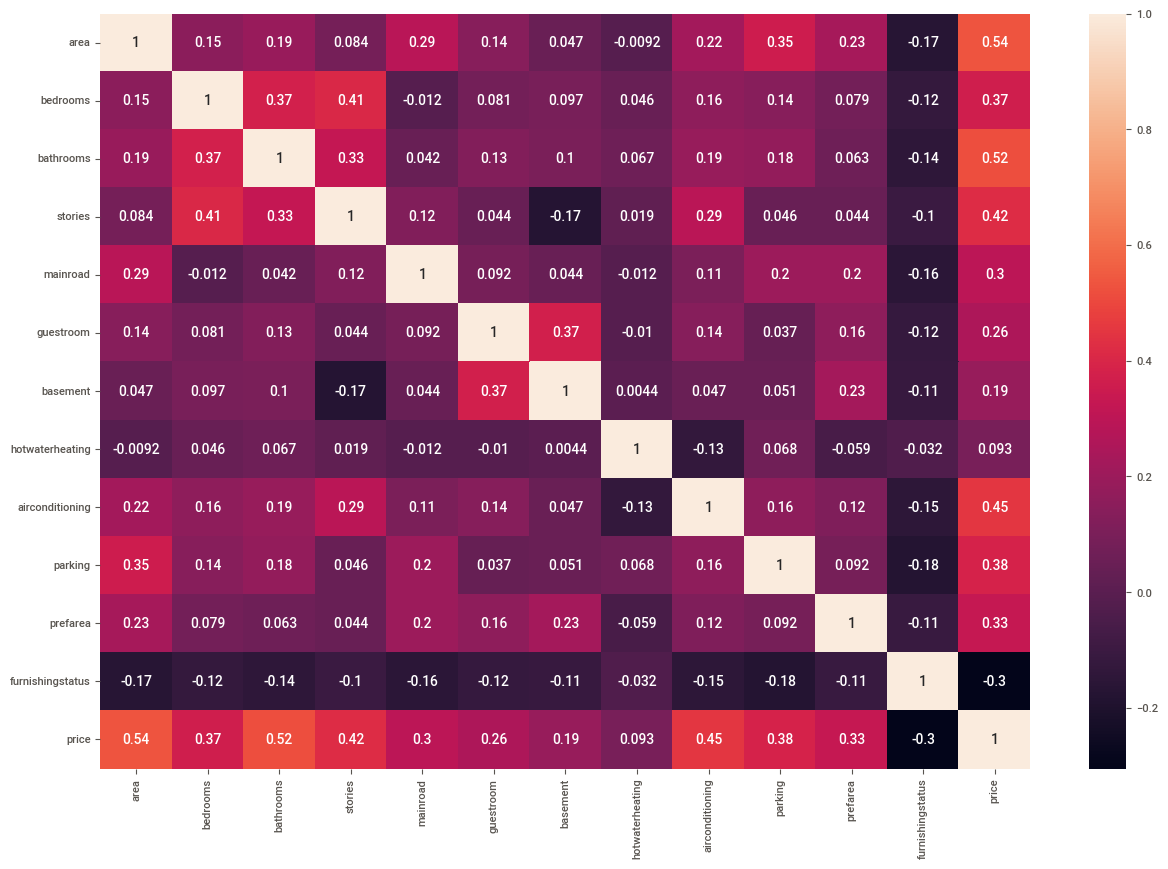

In [128]:
plt.figure(figsize = (15,10))
sns.heatmap(pd.concat([X,y], axis = 1).corr(), annot = True)
plt.show()

In [140]:
X.shape

(545, 12)

In [141]:
y.shape

(545,)

In [139]:
from sklearn.feature_selection import SelectKBest

In [151]:
SKB  = SelectKBest(k = 8)
SKB.fit(X,y)

SelectKBest(k=8)

In [155]:
imp_cols = SKB.get_feature_names_out()
imp_cols

array(['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'airconditioning', 'prefarea', 'furnishingstatus'], dtype=object)

In [157]:
SKB.n_features_in_

12

In [162]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [161]:
SKB.get_support()

array([ True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,  True])

In [163]:
imp_cols = X.columns[SKB.get_support()]
imp_cols

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [164]:
X = X[imp_cols]
X.head()

,area,bedrooms,bathrooms,stories,guestroom,airconditioning,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,-0.465315,1.472618,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,-0.465315,1.472618,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,-0.465315,-0.679063,1.804941,-0.091662
3,1.083624,1.403419,1.421812,0.224410,-0.465315,1.472618,1.804941,-1.406286
4,1.046726,1.403419,-0.570187,0.224410,2.149083,1.472618,-0.554035,-1.406286


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [123]:
from sklearn.linear_model import LinearRegression

# Training
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [124]:
model1.score(X_test,y_test)

0.6435419628959108

### Model Building

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [168]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [171]:
y_pred = model2.predict(X_test)

In [172]:
model2.score(X_test,y_test)

0.6193144896868267

In [173]:
np.sqrt(mean_squared_error(y_test, y_pred))

1280383.042743209